<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Dataset Description</title>
    <style>
        body {
            font-family: Arial, sans-serif;
        }
        h1 {
            color: red;
        }
        h2 {
            color: blue;
        }
        .feature-list {
            margin-left: 20px;
        }
        .feature-list li {
            color: #34495e;
        }
        .target-variable {
            color: #c0392b;
            font-weight: bold;
        }
    </style>
</head>
<body>
    <h1>About Dataset</h1>
    <p style="color:green;"<h2>Description:</h2>
    <p style="color: blue;">This dataset contains information on customer purchase behavior across various attributes, aiming to help data scientists and analysts understand the factors influencing purchase decisions. The dataset includes demographic information, purchasing habits, and other relevant features.</p>
    <h2>Features:</h2>
    <ul class="feature-list">
        <li>Age: Customer's age</li>
        <li>Gender: Customer's gender (0: Male, 1: Female)</li>
        <li>Annual Income: Annual income of the customer in dollars</li>
        <li>Number of Purchases: Total number of purchases made by the customer</li>
        <li>Product Category: Category of the purchased product (0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports)</li>
        <li>Time Spent on Website: Time spent by the customer on the website in minutes</li>
        <li>Loyalty Program: Whether the customer is a member of the loyalty program (0: No, 1: Yes)</li>
        <li>Discounts Availed: Number of discounts availed by the customer (range: 0-5)</li>
        <li class="target-variable">PurchaseStatus (Target Variable): Likelihood of the customer making a purchase (0: No, 1: Yes)</li>
    </ul>
    <p style="color:red;"<h2>Target Variable:</h2>
    <p>Distribution of the Target Variable (<span class="target-variable">PurchaseStatus</span>):</p>
    <ul class="feature-list">
        <li>0 (No Purchase): 48%</li>
        <li>1 (Purchase): 52%</li>
    </ul>
</body>
</html>


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats 

In [2]:
from sklearn.linear_model import LogisticRegression

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer

In [4]:
from sklearn.metrics import accuracy_score

<br>
Loading the datasets 

In [5]:
CustomerPurchase_Behavior = pd.read_csv('customer_purchase_data.csv')
CustomerPurchase_Behavior.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [6]:
CustomerPurchase_Behavior.sample(5)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
263,61,0,81997.013841,1,3,36.992557,0,4,0
457,54,0,90782.703264,19,4,5.195532,0,4,0
277,50,1,109555.089267,20,0,1.218442,1,3,1
340,56,1,59513.032161,15,2,11.061745,1,3,1
1484,68,0,80311.223269,14,2,19.080098,0,3,0


In [7]:
CustomerPurchase_Behavior.shape

(1500, 9)

In [8]:
CustomerPurchase_Behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [9]:
CustomerPurchase_Behavior.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [10]:
CustomerPurchase_Behavior_count = CustomerPurchase_Behavior.duplicated().sum()
print(f'Number of the duplicate rows : {CustomerPurchase_Behavior_count}')

Number of the duplicate rows : 112


In [11]:
CustomerPurchase_Behavior = CustomerPurchase_Behavior.drop_duplicates()

In [12]:
CustomerPurchase_Behavior_count = CustomerPurchase_Behavior.duplicated().sum()
print(f'Number of the duplicate rows : {CustomerPurchase_Behavior_count}')

Number of the duplicate rows : 0


In [13]:
shape_value = CustomerPurchase_Behavior.shape
print(f'shape of the data : {shape_value}')

shape of the data : (1388, 9)


In [14]:
CustomerPurchase_Behavior.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,43.939481,0.501441,84699.045444,10.548991,2.002882,30.747545,0.333573,2.609510,0.466859
std,15.487533,0.500178,37541.136478,5.869383,1.422851,16.976852,0.471659,1.699984,0.499080
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.000000
25%,30.750000,0.000000,53766.895806,6.000000,1.000000,16.379635,0.000000,1.000000,0.000000
50%,44.000000,1.000000,84625.292873,11.000000,2.000000,31.213146,0.000000,3.000000,0.000000
75%,57.000000,1.000000,117188.207975,15.000000,3.000000,44.666368,1.000000,4.000000,1.000000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.000000


In [15]:
CustomerPurchase_Behavior.describe().corr()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
Age,1.000000,0.999274,-0.510347,0.999632,0.999334,0.999933,0.999271,0.999361,0.999271
Gender,0.999274,1.000000,-0.542279,0.999931,0.999998,0.999317,1.000000,0.999997,1.000000
AnnualIncome,-0.510347,-0.542279,1.000000,-0.532458,-0.540840,-0.511137,-0.542316,-0.540199,-0.542317
NumberOfPurchases,0.999632,0.999931,-0.532458,1.000000,0.999950,0.999682,0.999930,0.999957,0.999930
ProductCategory,0.999334,0.999998,-0.540840,0.999950,1.000000,0.999379,0.999998,1.000000,0.999998
TimeSpentOnWebsite,0.999933,0.999317,-0.511137,0.999682,0.999379,1.000000,0.999315,0.999406,0.999315
LoyaltyProgram,0.999271,1.000000,-0.542316,0.999930,0.999998,0.999315,1.000000,0.999997,1.000000
DiscountsAvailed,0.999361,0.999997,-0.540199,0.999957,1.000000,0.999406,0.999997,1.000000,0.999997
PurchaseStatus,0.999271,1.000000,-0.542317,0.999930,0.999998,0.999315,1.000000,0.999997,1.000000


<br>
now we applying the eda

In [16]:
CustomerPurchase_Behavior.sample(4)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
469,38,1,117653.146215,12,4,30.687571,1,4,1
615,68,0,132488.448658,1,1,1.288183,0,5,0
209,42,0,42778.830374,17,3,59.985342,0,3,0
78,64,1,118052.273759,11,3,56.209206,0,3,1


In [17]:
CustomerPurchase_Behavior['Gender'].value_counts()

Gender
1    696
0    692
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2636\882599191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data = CustomerPurchase_Behavior,palette='Set2',edgecolor="black",width=0.1)


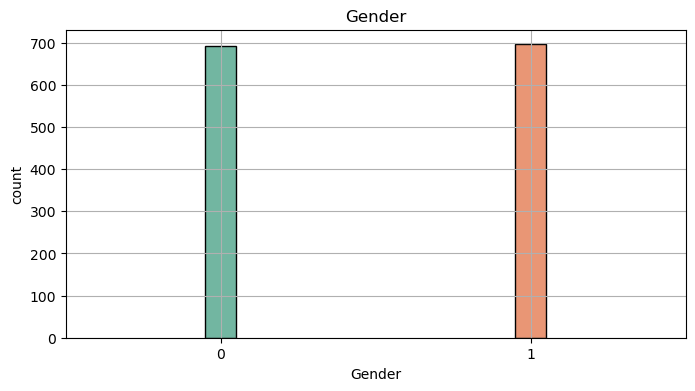

In [18]:
plt.figure(figsize = (8,4))
sns.countplot(x='Gender',data = CustomerPurchase_Behavior,palette='Set2',edgecolor="black",width=0.1)
plt.title('Gender')
plt.grid(True)
plt.show()

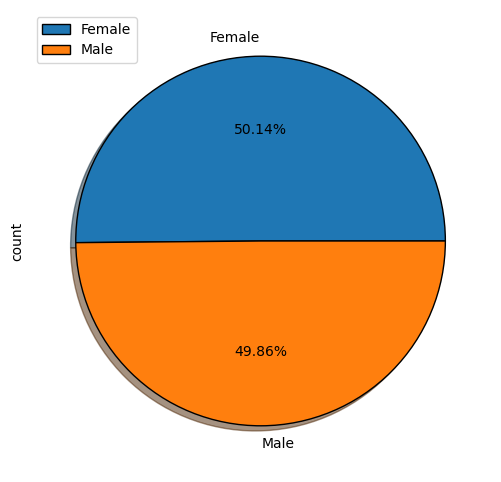

In [19]:
plt.figure(figze = (13,5))

# ex = [0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
labels = CustomerPurchase_Behavior['Gender'].value_counts().index.map({0: 'Male', 1: 'Female'})
CustomerPurchase_Behavior['Gender'].value_counts().plot(kind = 'pie',autopct = '%.2f%%',shadow=True,wedgeprops={'edgecolor': 'black'},labels = labels)
plt.legend(loc='upper left')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2636\2526532838.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ProductCategory',data = CustomerPurchase_Behavior,palette='Set2',edgecolor="black",width=0.1)


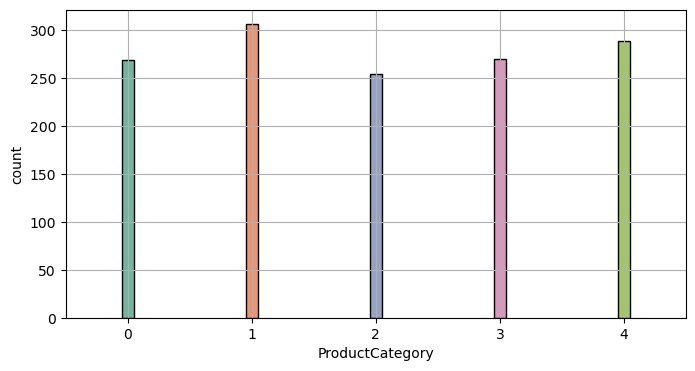

In [20]:
plt.figure(figsize = (8,4))
# labels = {0: 'Electronics', 1: 'Clothing', 2: 'Home Goods', 3: 'Beauty', 4: 'Sports'}
sns.countplot(x='ProductCategory',data = CustomerPurchase_Behavior,palette='Set2',edgecolor="black",width=0.1)
plt.grid(True)
plt.show()

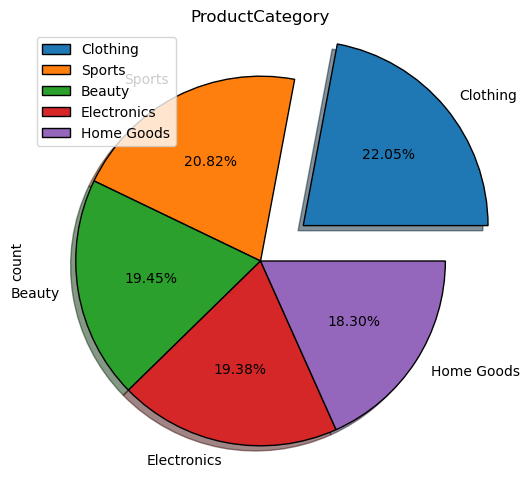

In [21]:
plt.figure(figsize =(10,6))
ex = [0.3,0.0,0.0,0.0,0.0]
labels = CustomerPurchase_Behavior['ProductCategory'].value_counts().index.map({0: 'Electronics', 1: 'Clothing', 2: 'Home Goods', 3: 'Beauty', 4: 'Sports'})
CustomerPurchase_Behavior['ProductCategory'].value_counts().plot(kind = 'pie',autopct = '%.2f%%',explode = ex,shadow=True,wedgeprops={'edgecolor': 'black'},labels = labels)
plt.title('ProductCategory')
plt.legend(loc='upper left')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2636\340232275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoyaltyProgram',data = CustomerPurchase_Behavior,palette='Set2',edgecolor="black",width=0.1)


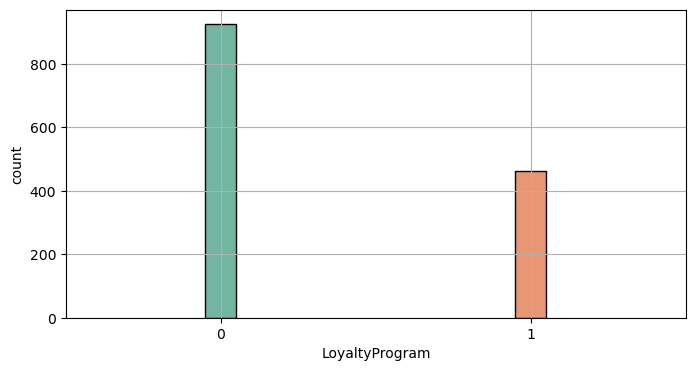

In [22]:
plt.figure(figsize = (8,4))
sns.countplot(x='LoyaltyProgram',data = CustomerPurchase_Behavior,palette='Set2',edgecolor="black",width=0.1)
plt.grid(True)
plt.show()

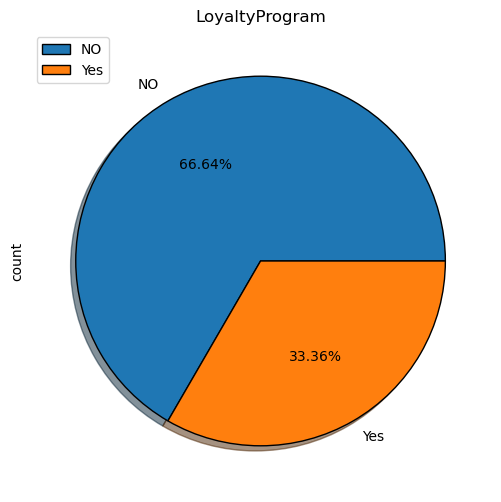

In [23]:
plt.figure(figsize =(10,6))
# ex = [0.3,0.0,0.0,0.0,0.0]
labels = CustomerPurchase_Behavior['LoyaltyProgram'].value_counts().index.map({0: 'NO', 1: 'Yes'})
CustomerPurchase_Behavior['LoyaltyProgram'].value_counts().plot(kind = 'pie',autopct = '%.2f%%',shadow=True,wedgeprops={'edgecolor': 'black'},labels = labels)
plt.title('LoyaltyProgram')
plt.legend(loc='upper left')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2636\631451669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DiscountsAvailed',data = CustomerPurchase_Behavior,palette='Set2',edgecolor="black",width=0.1)


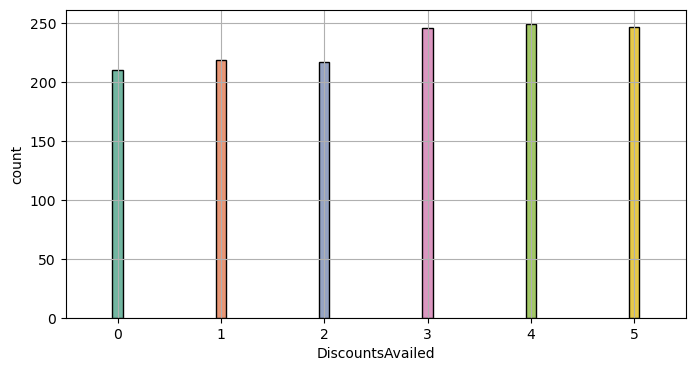

In [24]:
plt.figure(figsize = (8,4))
sns.countplot(x='DiscountsAvailed',data = CustomerPurchase_Behavior,palette='Set2',edgecolor="black",width=0.1)
plt.grid(True)
plt.show()

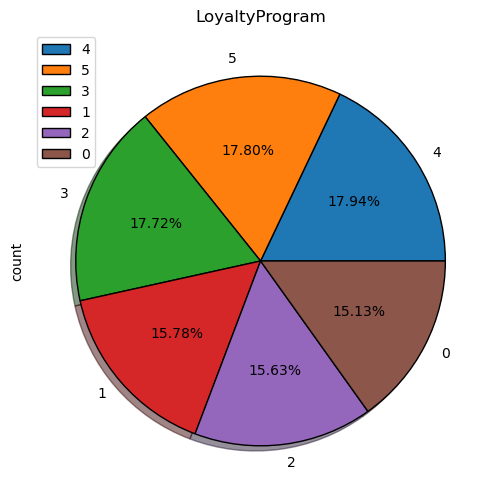

In [25]:
plt.figure(figsize =(10,6))
# ex = [0.3,0.0,0.0,0.0,0.0]
# labels = CustomerPurchase_Behavior['DiscountsAvailed'].value_counts().index.map({0: 'Purchased', 1: 'Not Purchased'})
CustomerPurchase_Behavior['DiscountsAvailed'].value_counts().plot(kind = 'pie',autopct = '%.2f%%',shadow=True,wedgeprops={'edgecolor': 'black'})
plt.title('LoyaltyProgram')
plt.legend(loc='upper left')
plt.show()

In [26]:
CustomerPurchase_Behavior.sample(4)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
972,51,0,49383.769716,1,0,29.718312,1,1,0
1331,47,0,63974.775779,12,0,50.561111,0,5,1
1111,31,1,47872.842789,5,3,40.877665,1,2,1
1000,36,0,68244.681996,19,2,1.555772,1,3,1


<Figure size 640x480 with 0 Axes>

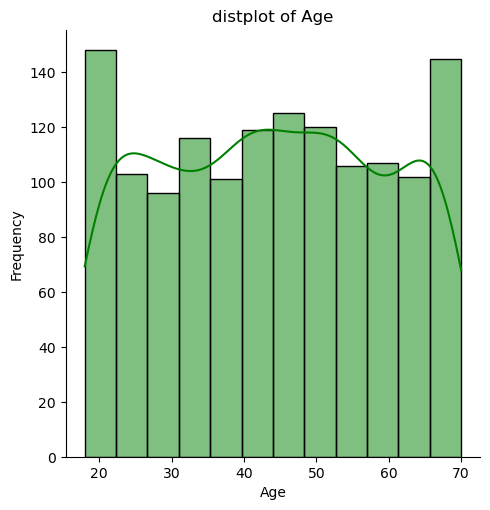

<Figure size 640x480 with 0 Axes>

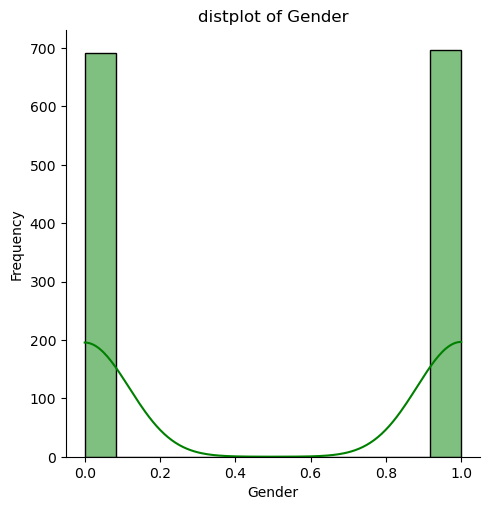

<Figure size 640x480 with 0 Axes>

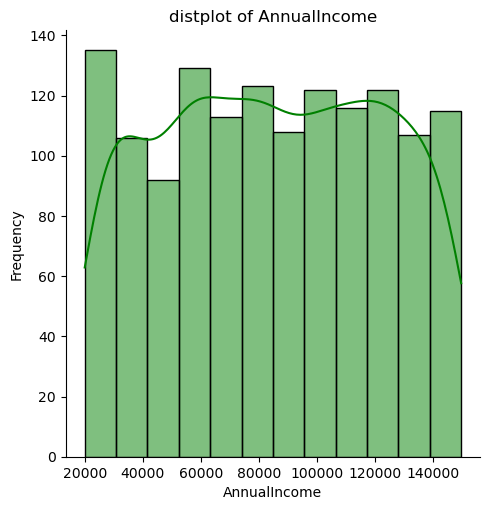

<Figure size 640x480 with 0 Axes>

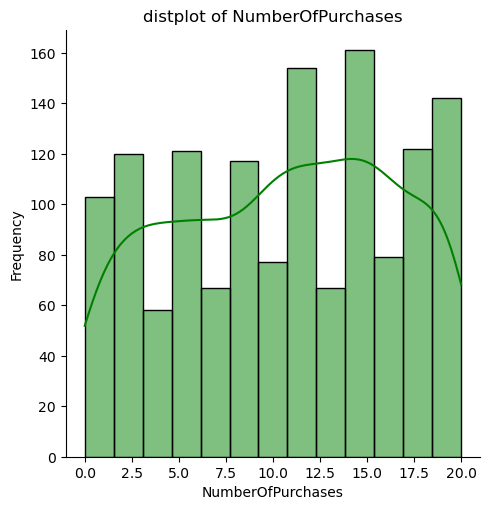

<Figure size 640x480 with 0 Axes>

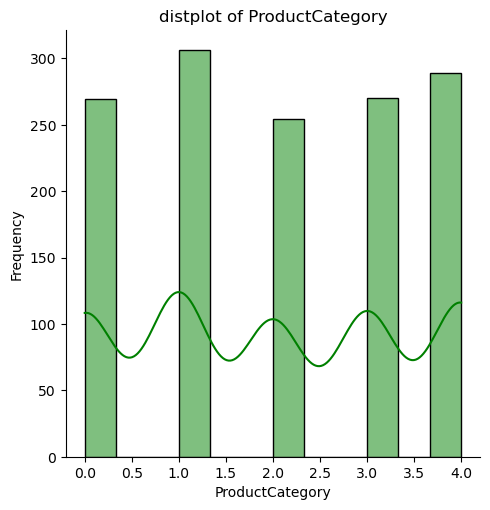

<Figure size 640x480 with 0 Axes>

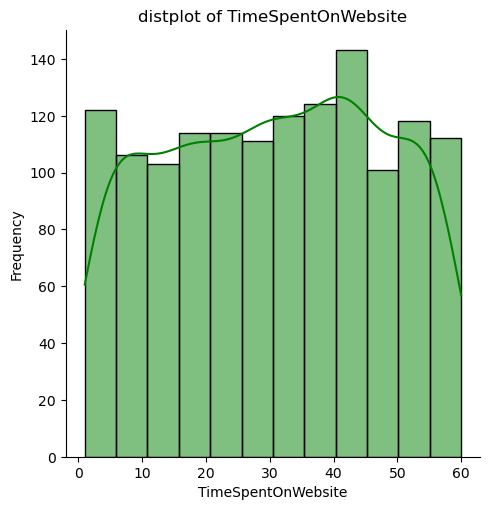

<Figure size 640x480 with 0 Axes>

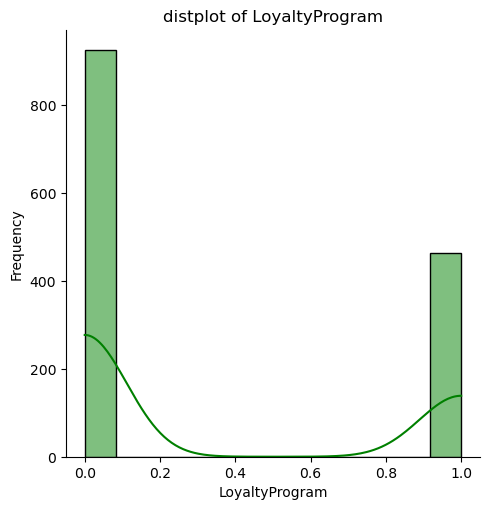

<Figure size 640x480 with 0 Axes>

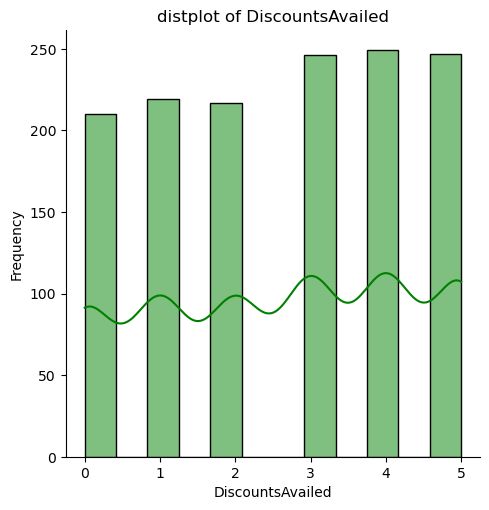

<Figure size 640x480 with 0 Axes>

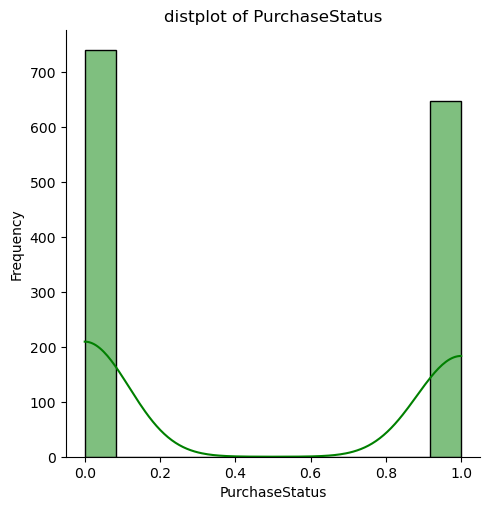

In [27]:
for column in CustomerPurchase_Behavior.columns:
    plt.figure()# Create a new figure for each plot
    sns.displot(CustomerPurchase_Behavior[column],color = "g",kde=True)  # Plot histogram with 10 bins
    plt.xlabel(column)  # Set x-axis label as the column name
    plt.ylabel('Frequency')  # Set y-axis label
    plt.title(f'distplot of {column}')  # Set plot titl
    plt.show() 

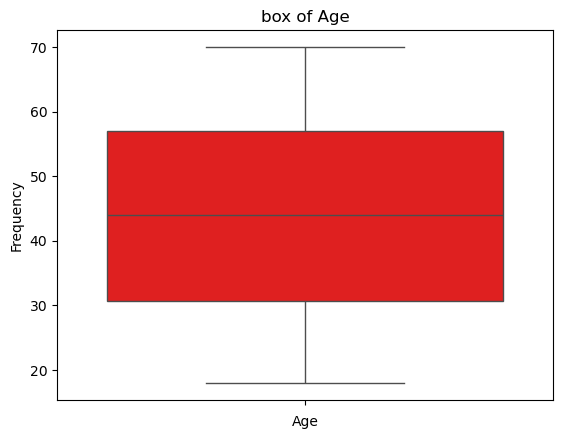

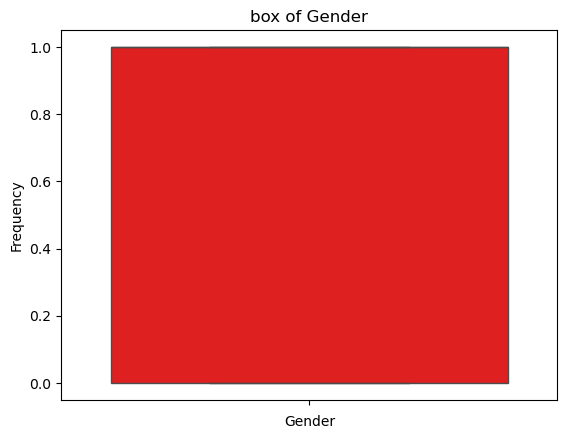

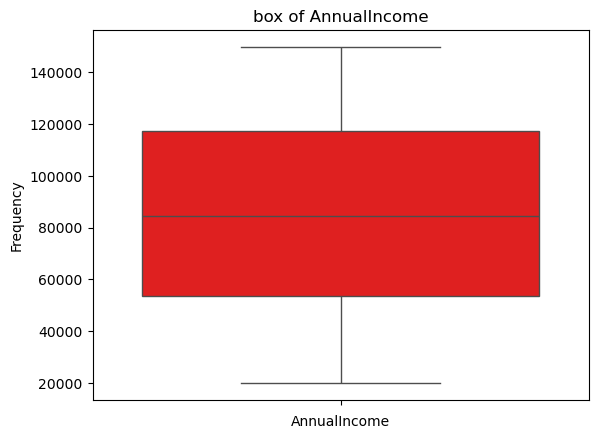

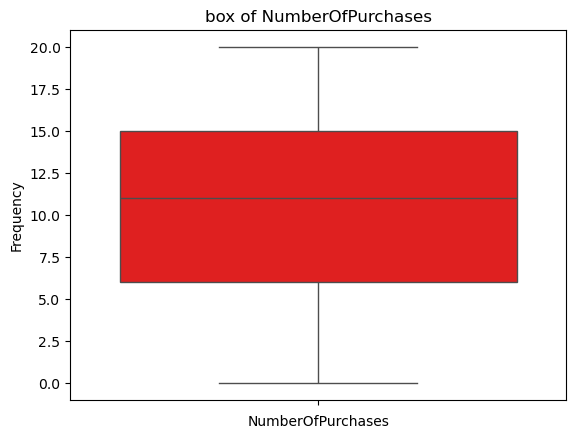

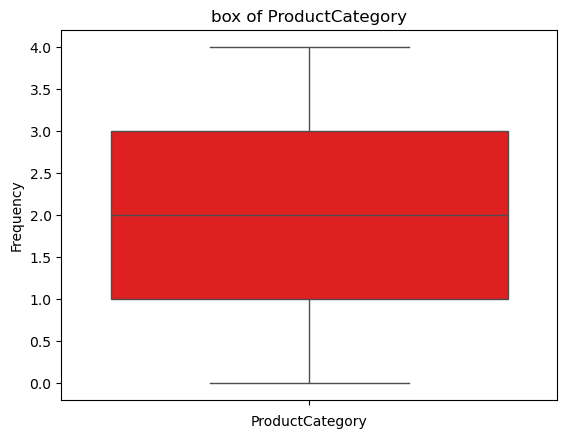

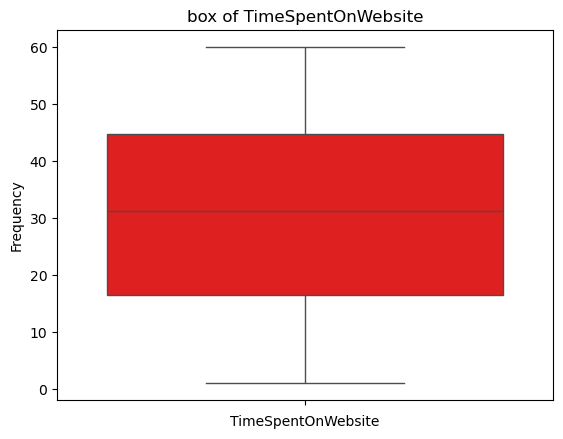

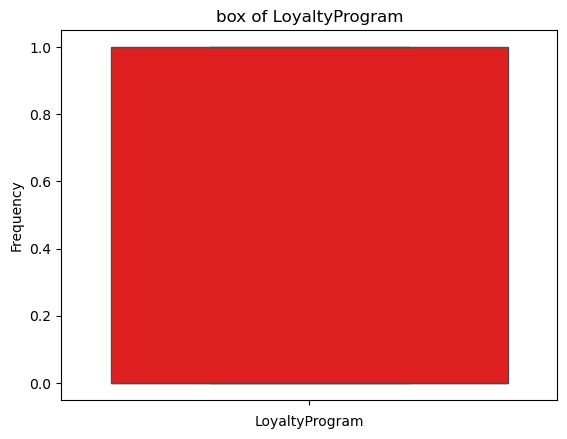

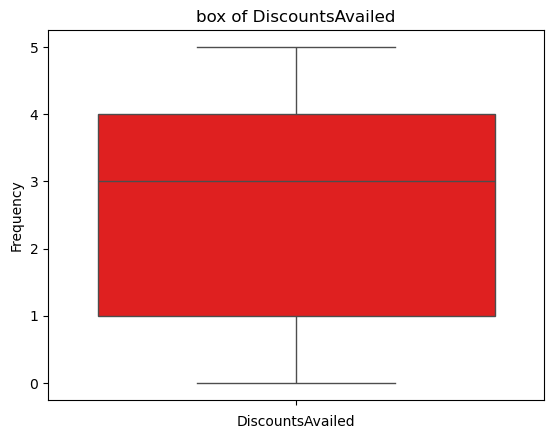

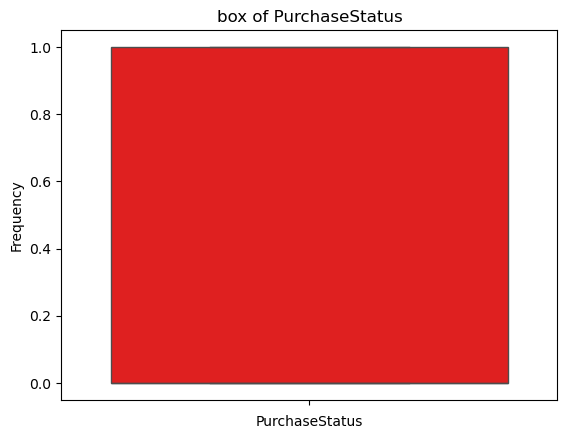

In [28]:
for column in CustomerPurchase_Behavior.columns:
    plt.figure()# Create a new figure for each plot
    sns.boxplot(CustomerPurchase_Behavior[column],color = "r")  # Plot histogram with 10 bins
    plt.xlabel(column)  # Set x-axis label as the column name
    plt.ylabel('Frequency')  # Set y-axis label
    plt.title(f'box of {column}')  # Set plot titl
    plt.show() 

In [29]:
CustomerPurchase_Behavior.sample(4)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
500,45,0,126073.102066,19,0,31.120695,1,1,1
429,68,1,121482.123265,13,0,4.535584,0,0,0
948,52,0,25838.468869,9,4,2.019995,1,0,0
1263,50,0,144881.506817,10,4,36.840833,1,5,1


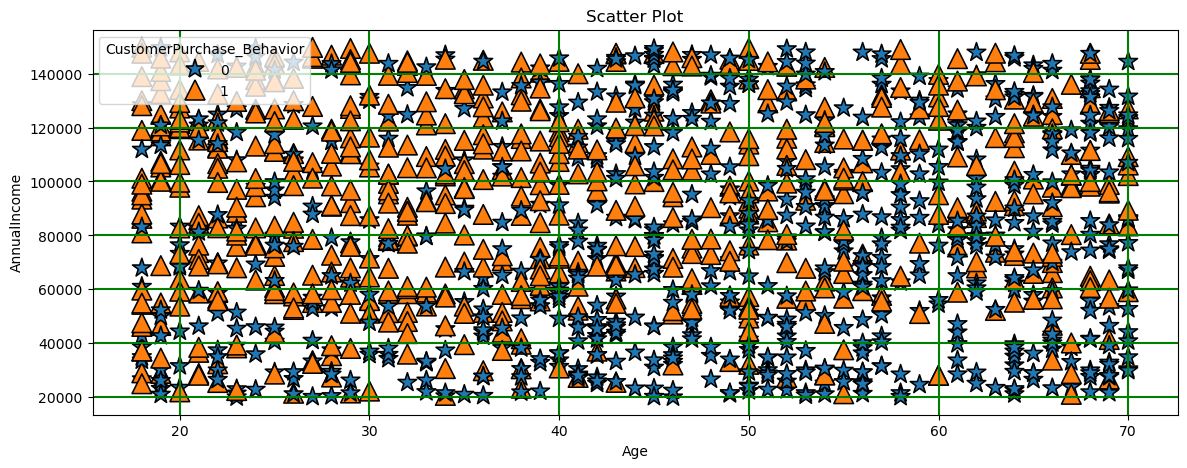

In [30]:
# Creating a scatter plotm 
plt.figure(figsize = (14,5))
m = {0:"*",1:"^"}
sns.scatterplot(x='Age', y='AnnualIncome',data =CustomerPurchase_Behavior,color = 'r',hue = 'PurchaseStatus',style = "PurchaseStatus",markers = m,s=200,edgecolor='black')
plt.title('Scatter Plot')
plt.legend(title='CustomerPurchase_Behavior',loc='upper left')
plt.grid(True,color = 'green',linewidth=1.5)

# Displaying the plot
plt.show()

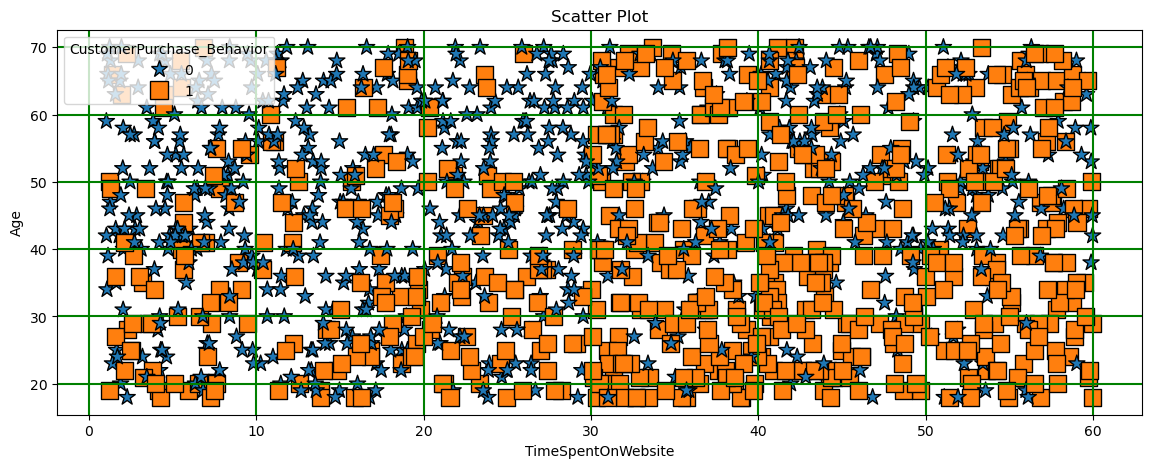

In [31]:
# Creating a scatter plotm 
plt.figure(figsize = (14,5))
m = {0:"*",1:"s"}
sns.scatterplot(x='TimeSpentOnWebsite', y='Age',data =CustomerPurchase_Behavior,color = 'r',hue = 'PurchaseStatus',style = "PurchaseStatus",markers = m,s=150,edgecolor='black')
plt.title('Scatter Plot')
plt.legend(title='CustomerPurchase_Behavior',loc='upper left')
plt.grid(True,color = 'green',linewidth=1.5)

# Displaying the plot
plt.show()

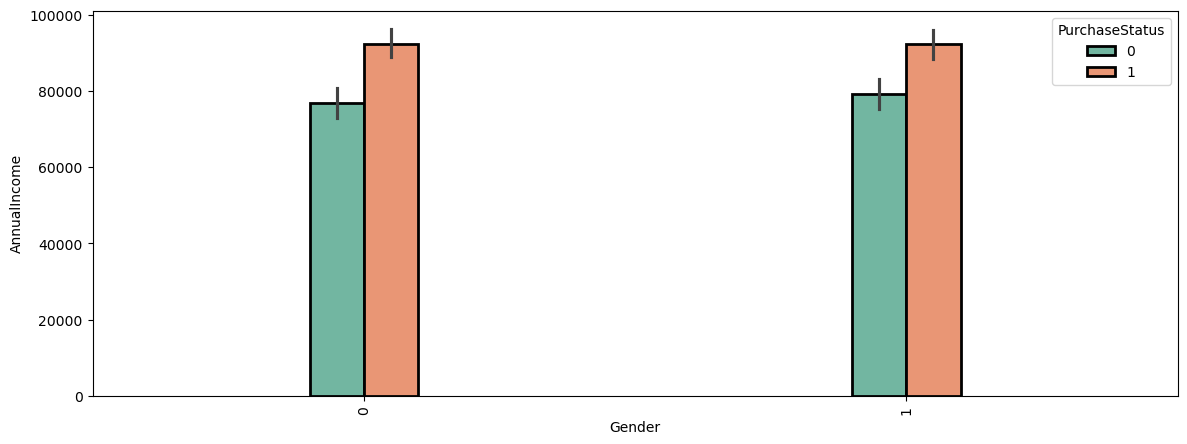

In [32]:
plt.figure(figsize = (14,5))
sns.barplot(x ="Gender",y="AnnualIncome",data=CustomerPurchase_Behavior,hue = 'PurchaseStatus',palette='Set2',edgecolor="black",linewidth=2,width=0.2)
plt.xticks(rotation=90)
# plt.title("python",fontsize= 20) 
plt.show()

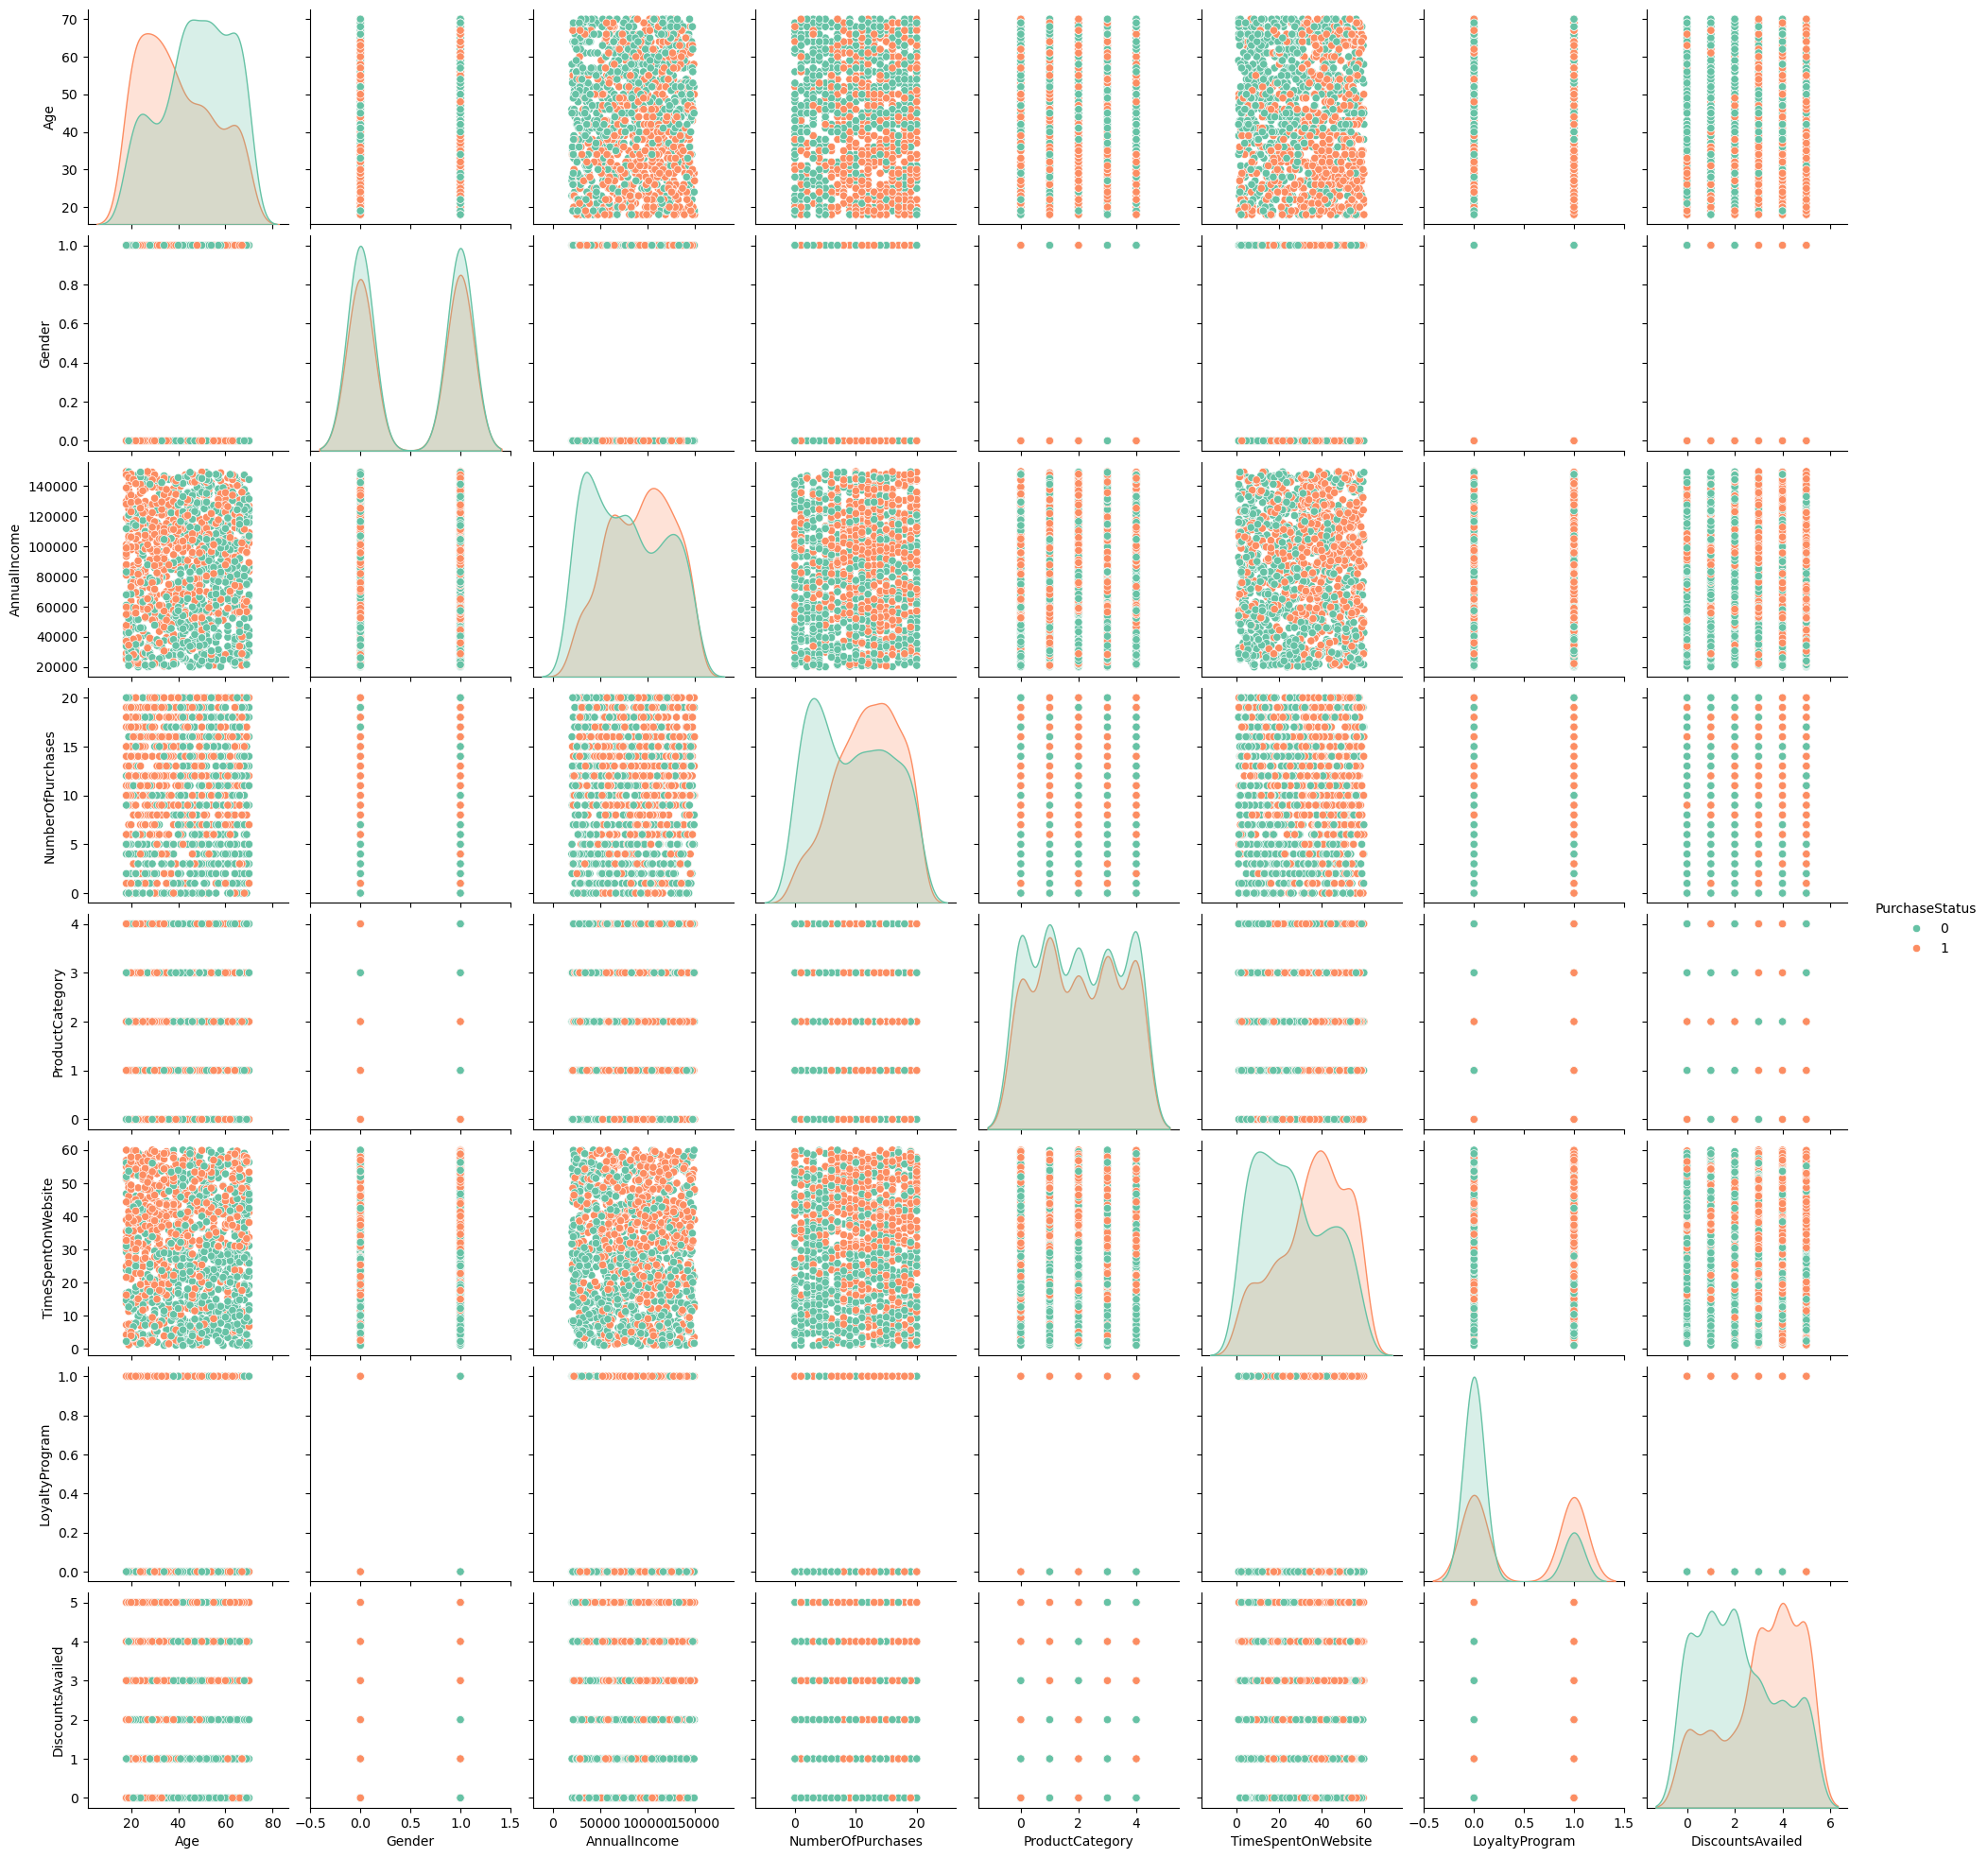

In [33]:
# fist we applying the pair polt
sns.pairplot(CustomerPurchase_Behavior,hue = 'PurchaseStatus',palette='Set2')
plt.show()

In [34]:
correlation_matrix = CustomerPurchase_Behavior.describe().corr()
correlation_matrix

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
Age,1.000000,0.999274,-0.510347,0.999632,0.999334,0.999933,0.999271,0.999361,0.999271
Gender,0.999274,1.000000,-0.542279,0.999931,0.999998,0.999317,1.000000,0.999997,1.000000
AnnualIncome,-0.510347,-0.542279,1.000000,-0.532458,-0.540840,-0.511137,-0.542316,-0.540199,-0.542317
NumberOfPurchases,0.999632,0.999931,-0.532458,1.000000,0.999950,0.999682,0.999930,0.999957,0.999930
ProductCategory,0.999334,0.999998,-0.540840,0.999950,1.000000,0.999379,0.999998,1.000000,0.999998
TimeSpentOnWebsite,0.999933,0.999317,-0.511137,0.999682,0.999379,1.000000,0.999315,0.999406,0.999315
LoyaltyProgram,0.999271,1.000000,-0.542316,0.999930,0.999998,0.999315,1.000000,0.999997,1.000000
DiscountsAvailed,0.999361,0.999997,-0.540199,0.999957,1.000000,0.999406,0.999997,1.000000,0.999997
PurchaseStatus,0.999271,1.000000,-0.542317,0.999930,0.999998,0.999315,1.000000,0.999997,1.000000


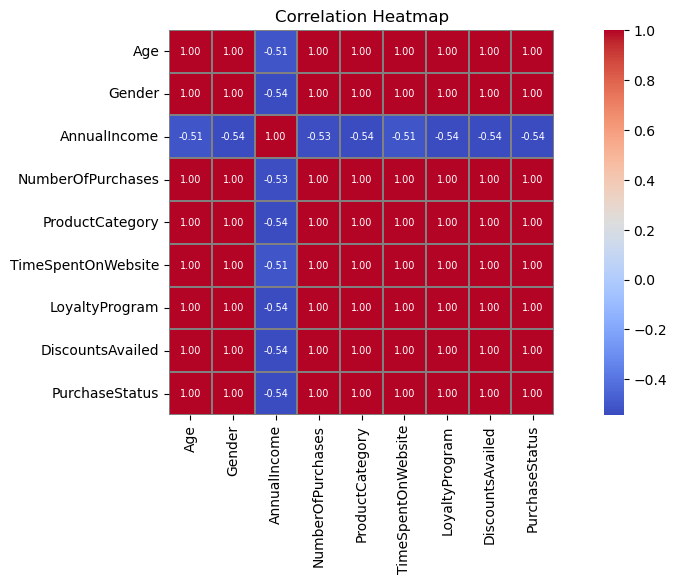

In [59]:
plt.figure(figsize=(13, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True,linewidths=0.3,linecolor='gray',annot_kws={"size": 7},fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

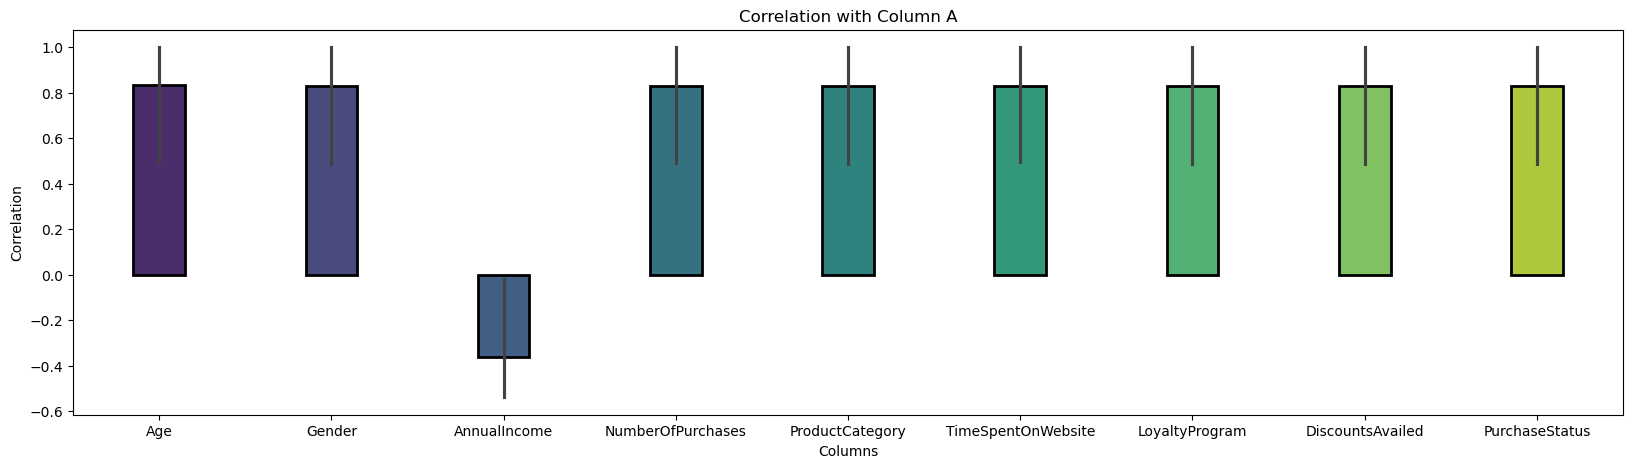

In [60]:
plt.figure(figsize=(20, 5))
# sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')
sns.barplot(correlation_matrix, palette='viridis',edgecolor='black', linewidth=2,width=0.3)
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')    
plt.show()

In [65]:
CustomerPurchase_Behavior.head(4)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1


In [76]:
x = CustomerPurchase_Behavior.drop('PurchaseStatus',axis = 1)
y = CustomerPurchase_Behavior['PurchaseStatus']

In [78]:
x.head(3)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,40,1,66120.267939,8,0,30.568601,0,5
1,20,1,23579.773583,4,2,38.240097,0,5
2,27,1,127821.306432,11,2,31.633212,1,0


In [79]:
y

0       1
1       0
2       1
3       1
4       1
       ..
1495    1
1496    1
1497    0
1498    1
1499    1
Name: PurchaseStatus, Length: 1388, dtype: int64

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [83]:
numerical_features = ['AnnualIncome','TimeSpentOnWebsite']

In [84]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [85]:
# Create the final pipeline including the preprocessor and a classifier
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('logistic regression', LogisticRegression())
])

In [87]:
from sklearn import set_config
# Plot the pipeline
set_config(display='diagram')
display(pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic regression', LogisticRegression())])

In [88]:
pipeline.fit(x_train, y_train)

# Make predictions
y_pred = pipeline.predict(x_test)

In [90]:
accuracy_score(y_test,y_pred)

0.8525179856115108